In [3]:
import torch
torch.cuda.empty_cache() 

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [5]:
import pandas as pd
import pyproj

In [6]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [7]:
from pathlib import Path

In [8]:
import joblib

In [9]:
from mt_function_yl import *

In [10]:
import seaborn as sn

In [11]:
from scipy import stats

In [12]:
from tabulate import tabulate

In [13]:
import statsmodels.api as sm

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay

### Data loading

In [15]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [16]:
acv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_accident.csv')
rpv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_rp.csv')

In [17]:
# personal injusry presence
acv = acv.assign(inp = 1)
acv.loc[(acv['SV'] == 0) & (acv['LV'] == 0), 'inp'] = 0

In [19]:
print(acv.columns.values)

['Nr' 'cp' 'ie' 'iemin' 'iemax' 'mew' 'mewmin' 'mewmax' 'meg' 'megmin'
 'megmax' 'cmean' 'cmin' 'cmax' 'dbusl' 'dtraml' 'dtrainl' 'dplight'
 'dstation' 'dparkcar' 'dparktw' 'dpedcro' 'dstopsign' 'dcurb'
 'dtrafficarea' 'droad' 'droad_sl' 'dvfpath' 'd_bicyclecount' 'd_carcount'
 'gvm_dwv' 'gvm_msp' 'gvm_asp' 'bicyclecount' 'carcount' 'r_width_value'
 'speedlimit_value' 'curbtype' 'z_qnr' 'z_knr' 'trafficarea' 'r_width'
 'r_surface' 'speedlimit' 'curbtype_1' 'curbtype_2' 'z_qnr_1' 'z_qnr_2'
 'z_qnr_3' 'z_qnr_4' 'z_qnr_5' 'z_qnr_6' 'z_qnr_7' 'z_qnr_8' 'z_qnr_9'
 'z_qnr_10' 'z_qnr_11' 'z_qnr_12' 'z_qnr_13' 'z_qnr_14' 'z_qnr_15'
 'z_qnr_16' 'z_qnr_17' 'z_qnr_18' 'z_qnr_19' 'z_qnr_20' 'z_qnr_21'
 'z_qnr_22' 'z_qnr_23' 'z_qnr_24' 'z_qnr_25' 'z_qnr_26' 'z_qnr_27'
 'z_qnr_28' 'z_qnr_29' 'z_qnr_30' 'z_qnr_31' 'z_qnr_32' 'z_qnr_33'
 'z_knr_1' 'z_knr_2' 'z_knr_3' 'z_knr_4' 'z_knr_5' 'z_knr_6' 'z_knr_7'
 'z_knr_8' 'z_knr_9' 'z_knr_10' 'z_knr_11' 'z_knr_12' 'trafficarea_1'
 'trafficarea_2' 'traffica

In [21]:
print(rpv.columns.values)

['id' 'cp' 'ie' 'iemin' 'iemax' 'mew' 'mewmin' 'mewmax' 'meg' 'megmin'
 'megmax' 'cmean' 'cmin' 'cmax' 'dbusl' 'dtraml' 'dtrainl' 'dplight'
 'dstation' 'dparkcar' 'dparktw' 'dpedcro' 'dstopsign' 'dcurb'
 'dtrafficarea' 'droad' 'droad_sl' 'dvfpath' 'd_bicyclecount' 'd_carcount'
 'gvm_dwv' 'gvm_msp' 'gvm_asp' 'bicyclecount' 'carcount' 'r_width_value'
 'speedlimit_value' 'curbtype' 'z_qnr' 'z_knr' 'trafficarea' 'r_width'
 'r_surface' 'speedlimit' 'curbtype_1' 'curbtype_2' 'z_qnr_1' 'z_qnr_2'
 'z_qnr_3' 'z_qnr_4' 'z_qnr_5' 'z_qnr_6' 'z_qnr_7' 'z_qnr_8' 'z_qnr_9'
 'z_qnr_10' 'z_qnr_11' 'z_qnr_12' 'z_qnr_13' 'z_qnr_14' 'z_qnr_15'
 'z_qnr_16' 'z_qnr_17' 'z_qnr_18' 'z_qnr_19' 'z_qnr_20' 'z_qnr_21'
 'z_qnr_22' 'z_qnr_23' 'z_qnr_24' 'z_qnr_25' 'z_qnr_26' 'z_qnr_27'
 'z_qnr_28' 'z_qnr_29' 'z_qnr_30' 'z_qnr_31' 'z_qnr_32' 'z_qnr_33'
 'z_qnr_34' 'z_knr_1' 'z_knr_2' 'z_knr_3' 'z_knr_4' 'z_knr_5' 'z_knr_6'
 'z_knr_7' 'z_knr_8' 'z_knr_9' 'z_knr_10' 'z_knr_11' 'z_knr_12'
 'trafficarea_1' 'trafficarea_2

In [302]:
acv.groupby(['SV']).size()

SV
0    246
1     49
dtype: int64

In [303]:
acv.groupby(['svp']).size()

svp
0    246
1     49
dtype: int64

In [24]:
acv.groupby(['inp']).size()

inp
0     40
1    255
dtype: int64

In [25]:
acv.groupby(['pdp']).size()

pdp
0    146
1    149
dtype: int64

In [274]:
len(rpv.columns.values)

111

### Regression

In [199]:
# Remove 'd_bicyclecount' 'd_carcount''droad_sl'
cn = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount']

In [27]:
len(cn)

98

In [28]:
acv.shape

(295, 116)

In [234]:
y1 = acv['svp']
x = acv[cn]
x = sm.add_constant(x)
model1 = sm.OLS(y1, x)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    svp   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.083
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.325
Time:                        09:48:30   Log-Likelihood:                -80.491
No. Observations:                 295   AIC:                             313.0
Df Residuals:                     219   BIC:                             593.2
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                  -0.0674      0.223     -0.302      0.763      -0.507       0.372
ie                   0.3671      0.222      1.652      0.100      -0.071       0.805
iemin               -0.1745      0.137     -1.271      0.205      -0.445       0.096
iemax               -0.2033      0.112     -1.816      0.071      -0.424       0.017
mew                 -0.0885      0.122     -0.727      0.468      -0.328       0.151
mewmin               0.0526      0.081      0.650      0.516      -0.107       0.212
mewmax              -0.0120      0.067     -0.178      0.859      -0.145       0.121
meg                 -0.0277      0.085     -0.325      0.745      -0.196       0.140
megmin               0.0162      0.061      0.265      0.791      -0.104       0.137
megmax               0.0570      0.046      1.232      0.219      -0.034       0.148
cmean                0.1118      0.122      0.918      0.360      -0.128       0.352
cmin                -0.0231      0.027     -0.843      0.400      -0.077       0.031
cmax                -0.0842      0.162     -0.521      0.603      -0.403       0.234
dbusl               -0.0136      0.033     -0.417      0.677      -0.078       0.051
dtraml              -0.0018      0.033     -0.053      0.958      -0.067       0.064
dtrainl             -0.0465      0.031     -1.477      0.141      -0.109       0.016
dplight             -0.0307      0.027     -1.135      0.257      -0.084       0.023
dstation             0.0415      0.028      1.479      0.141      -0.014       0.097
dparkcar            -0.0206      0.032     -0.641      0.522      -0.084       0.043
dparktw              0.0185      0.031      0.592      0.554      -0.043       0.080
dpedcro              0.0192      0.027      0.707      0.480      -0.034       0.073
dstopsign            0.0183      0.036      0.506      0.613      -0.053       0.089
dcurb               -0.0830      0.047     -1.773      0.078      -0.175       0.009
dtrafficarea         0.0161      0.038      0.430      0.668      -0.058       0.090
droad                0.1117      0.047      2.388      0.018       0.020       0.204
dvfpath              0.0103      0.037      0.277      0.782      -0.063       0.083
gvm_dwv              0.2422      0.204      1.188      0.236      -0.159       0.644
gvm_msp             -0.1015      0.173     -0.586      0.559      -0.443       0.240
gvm_asp             -0.0578      0.206     -0.281      0.779      -0.464       0.348
r_width_value        0.0418      0.040      1.036      0.301      -0.038       0.121
speedlimit_value     0.0828      0.085      0.979      0.329      -0.084       0.249
curbtype_1           0.1169      0.059      1.984      0.048       0.001       0.233
curbtype_2           0.0513      0.062      0.829      0.408      -0.071       0.173
z_qnr_1             -0.

In [30]:
xrp1 = rpv[cn]
ols_svp = result1.predict(xrp1)

(array([ 23., 115., 313., 221.,  72.,  24.,  18.,   3.,   1.,   2.]),
 array([-0.67807218, -0.39913541, -0.12019864,  0.15873813,  0.4376749 ,
         0.71661167,  0.99554844,  1.27448521,  1.55342198,  1.83235875,
         2.11129552]),
 <BarContainer object of 10 artists>)

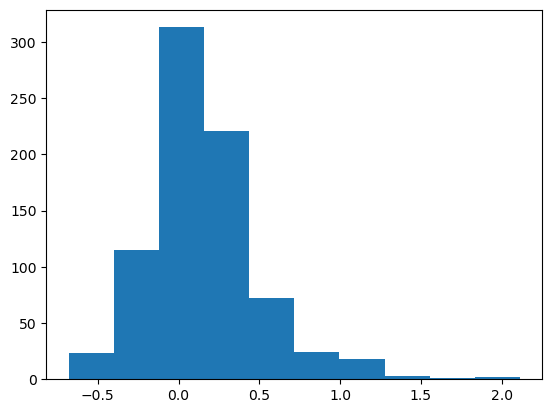

In [31]:
plt.hist(ols_svp)

In [235]:
r1p = result1.pvalues

In [236]:
r1pdf = pd.DataFrame(r1p)
r1pdf = r1pdf.reset_index()

In [237]:
r1pdf.columns

Index(['index', 0], dtype='object')

In [238]:
print(r1pdf.nsmallest(15, 0))

            index         0
67        z_knr_2  0.000065
34        z_qnr_2  0.001087
88    r_surface_1  0.009891
24          droad  0.017777
84      r_width_4  0.026391
31     curbtype_1  0.048491
80  trafficarea_3  0.068112
3           iemax  0.070784
22          dcurb  0.077603
86      r_width_6  0.092447
94   speedlimit_5  0.095999
1              ie  0.099993
70        z_knr_5  0.114489
96   bicyclecount  0.120359
17       dstation  0.140537


In [35]:
print(r1pdf.nsmallest(15, 0))

            index         0
67        z_knr_2  0.000065
34        z_qnr_2  0.001087
88    r_surface_1  0.009891
24          droad  0.017777
84      r_width_4  0.026391
31     curbtype_1  0.048491
80  trafficarea_3  0.068112
3           iemax  0.070784
22          dcurb  0.077603
86      r_width_6  0.092447
94   speedlimit_5  0.095999
1              ie  0.099993
70        z_knr_5  0.114489
96   bicyclecount  0.120359
17       dstation  0.140537


In [36]:
a = r1pdf.nsmallest(15, 0)
ten1 = a['index'].to_list()

In [37]:
ten1

['z_knr_2',
 'z_qnr_2',
 'r_surface_1',
 'droad',
 'r_width_4',
 'curbtype_1',
 'trafficarea_3',
 'iemax',
 'dcurb',
 'r_width_6',
 'speedlimit_5',
 'ie',
 'z_knr_5',
 'bicyclecount',
 'dstation']

In [232]:
pv1 =['z_knr_2','z_qnr_2','r_surface_1','droad','r_width_4','curbtype_1']

In [38]:
y1 = acv['svp']
x1i = acv[ten1]
x1i = sm.add_constant(x1i)
model1i = sm.OLS(y1, x1i)
result1i = model1i.fit()
result1i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    svp   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3.400
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           4.25e-05
Time:                        08:51:49   Log-Likelihood:                -103.85
No. Observations:                 295   AIC:                             237.7
Df Residuals:                     280   BIC:                             293.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
z_knr_2           0.0935      0.148      0.632      0.528      -0.198       0.385
z_qnr_2           0.7181      0.243      2.956      0.003       0.240       1.196
r_surface_1       0.0300      0.069      0.435      0.664      -0.106       0.166
droad             0.1004      0.031      3.217      0.001       0.039       0.162
r_width_4         0.1029      0.053      1.926      0.055      -0.002       0.208
curbtype_1        0.0653      0.068      0.967      0.335      -0.068       0.198
trafficarea_3     0.1713      0.072      2.382      0.018       0.030       0.313
iemax            -0.1107      0.055     -2.023      0.044      -0.218      -0.003
dcurb            -0.0530      0.031     -1.733      0.084      -0.113       0.007
r_width_6         0.1251      0.088      1.422      0.156      -0.048       0.298
speedlimit_5      0.6436      0.373      1.728      0.085      -0.090       1.377
ie                0.0982      0.055      1.795      0.074      -0.009       0.206
z_knr_5           0.1553      0.074      2.100      0.037       0.010       0.301
bicyclecount     -0.0378      0.021     -1.832      0.068      -0.079       0.003
dstation          0.0253      0.021      1.181      0.239      -0.017       0.068
==============================================================================
Omnibus:                       78.893   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.365
Skew:                           1.564   Prob(JB):                     1.48e-30
Kurtosis:                       4.181   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
y1 = acv['svp']
x1i1 = acv[pv1]
x1i1 = sm.add_constant(x1i1)
model1i1 = sm.OLS(y1, x1i1)
result1i1 = model1i1.fit()
result1i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    svp   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     3.827
Date:                Fri, 26 Apr 2024   Prob (F-statistic):            0.00226
Time:                        09:38:39   Log-Likelihood:                -117.55
No. Observations:                 295   AIC:                             247.1
Df Residuals:                     289   BIC:                             269.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
z_knr_2         0.0502      0.151      0.332      0.740      -0.247       0.348
z_qnr_2         0.6206      0.243      2.550      0.011       0.142       1.100
r_surface_1     0.1440      0.058      2.474      0.014       0.029       0.258
droad           0.0588      0.022      2.630      0.009       0.015       0.103
r_width_4       0.0818      0.053      1.546      0.123      -0.022       0.186
curbtype_1     -0.0048      0.061     -0.079      0.937      -0.125       0.115
==============================================================================
Omnibus:                       90.793   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.131
Skew:                           1.738   Prob(JB):                     4.19e-38
Kurtosis:                       4.385   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
y2 = acv['lvp']
x = acv[cn]
x = sm.add_constant(x)
model2 = sm.OLS(y2, x)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lvp   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9827
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.524
Time:                        08:51:51   Log-Likelihood:                -140.02
No. Observations:                 295   AIC:                             432.0
Df Residuals:                     219   BIC:                             712.2
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                   0.2638      0.273      0.966      0.335      -0.274       0.802
ie                  -0.4742      0.272     -1.744      0.083      -1.010       0.062
iemin                0.3574      0.168      2.128      0.034       0.026       0.688
iemax                0.2160      0.137      1.576      0.116      -0.054       0.486
mew                 -0.0168      0.149     -0.113      0.910      -0.310       0.277
mewmin              -0.0213      0.099     -0.216      0.830      -0.217       0.174
mewmax               0.0701      0.082      0.852      0.395      -0.092       0.232
meg                  0.0461      0.104      0.442      0.659      -0.159       0.251
megmin               0.0008      0.075      0.010      0.992      -0.147       0.148
megmax              -0.0430      0.057     -0.760      0.448      -0.154       0.069
cmean               -0.0935      0.149     -0.627      0.531      -0.387       0.200
cmin                 0.0509      0.034      1.515      0.131      -0.015       0.117
cmax                -0.0296      0.198     -0.150      0.881      -0.420       0.360
dbusl               -0.0292      0.040     -0.732      0.465      -0.108       0.049
dtraml              -0.0537      0.041     -1.316      0.189      -0.134       0.027
dtrainl              0.0287      0.039      0.745      0.457      -0.047       0.105
dplight              0.0372      0.033      1.122      0.263      -0.028       0.102
dstation            -0.0506      0.034     -1.472      0.142      -0.118       0.017
dparkcar             0.0263      0.039      0.668      0.505      -0.051       0.104
dparktw              0.0123      0.038      0.323      0.747      -0.063       0.087
dpedcro              0.0056      0.033      0.168      0.867      -0.060       0.071
dstopsign           -0.0601      0.044     -1.362      0.175      -0.147       0.027
dcurb                0.0879      0.057      1.534      0.126      -0.025       0.201
dtrafficarea        -0.0603      0.046     -1.315      0.190      -0.151       0.030
droad               -0.0181      0.057     -0.316      0.752      -0.131       0.095
dvfpath             -0.0125      0.045     -0.276      0.783      -0.102       0.077
gvm_dwv             -0.2108      0.249     -0.845      0.399      -0.702       0.281
gvm_msp              0.1740      0.212      0.821      0.413      -0.244       0.592
gvm_asp             -0.0118      0.252     -0.047      0.963      -0.508       0.485
r_width_value       -0.0591      0.049     -1.196      0.233      -0.157       0.038
speedlimit_value    -0.0384      0.103     -0.371      0.711      -0.242       0.166
curbtype_1           0.0304      0.072      0.422      0.674      -0.112       0.172
curbtype_2           0.2256      0.076      2.982      0.003       0.076       0.375
z_qnr_1             -0.

(array([  3.,   1.,  13.,  30., 112., 249., 211., 118.,  47.,   8.]),
 array([-1.17502004, -0.81294033, -0.45086063, -0.08878092,  0.27329879,
         0.6353785 ,  0.99745821,  1.35953791,  1.72161762,  2.08369733,
         2.44577704]),
 <BarContainer object of 10 artists>)

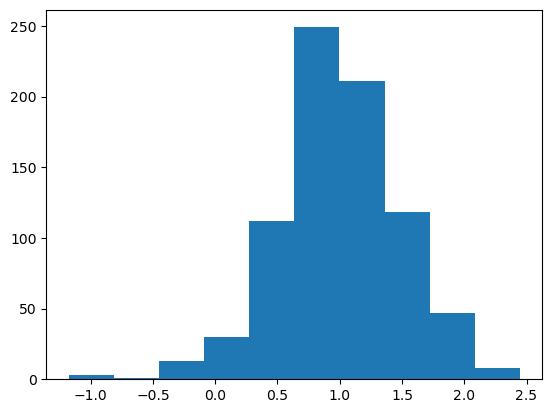

In [40]:
ols_lvp = result2.predict(xrp1)
plt.hist(ols_lvp)

In [41]:
r2p = result2.pvalues
r2pdf = pd.DataFrame(r2p)
r2pdf = r2pdf.reset_index()
a2 = r2pdf.nsmallest(15, 0)
print(a2)
ten2 = a2['index'].to_list()

            index         0
67        z_knr_2  0.000417
88    r_surface_1  0.001389
79  trafficarea_2  0.002254
32     curbtype_2  0.003191
85      r_width_5  0.023017
2           iemin  0.034471
69        z_knr_4  0.035271
34        z_qnr_2  0.036908
74        z_knr_9  0.042756
92   speedlimit_3  0.048674
94   speedlimit_5  0.064298
1              ie  0.082539
52       z_qnr_20  0.106309
3           iemax  0.116383
22          dcurb  0.126454


In [42]:
y2 = acv['lvp']
x2i = acv[ten2]
x2i = sm.add_constant(x2i)
model2i = sm.OLS(y2, x2i)
result2i = model2i.fit()
result2i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lvp   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.046
Date:                Fri, 26 Apr 2024   Prob (F-statistic):             0.0149
Time:                        08:51:54   Log-Likelihood:                -168.44
No. Observations:                 295   AIC:                             366.9
Df Residuals:                     280   BIC:                             422.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
z_knr_2          -0.3461      0.184     -1.877      0.062      -0.709       0.017
r_surface_1       0.6664      0.047     14.086      0.000       0.573       0.759
trafficarea_2     0.0486      0.090      0.537      0.592      -0.130       0.227
curbtype_2        0.1542      0.085      1.817      0.070      -0.013       0.321
r_width_5         0.0214      0.056      0.378      0.705      -0.090       0.132
iemin             0.2274      0.143      1.586      0.114      -0.055       0.510
z_knr_4           0.0907      0.069      1.310      0.191      -0.046       0.227
z_qnr_2          -0.2507      0.297     -0.844      0.399      -0.835       0.334
z_knr_9           0.1198      0.071      1.689      0.092      -0.020       0.260
speedlimit_3      0.3314      0.454      0.729      0.466      -0.563       1.226
speedlimit_5     -0.8860      0.453     -1.956      0.051      -1.778       0.006
ie               -0.3067      0.233     -1.316      0.189      -0.766       0.152
z_qnr_20         -0.1769      0.129     -1.369      0.172      -0.431       0.078
iemax             0.1598      0.116      1.378      0.169      -0.068       0.388
dcurb             0.0372      0.027      1.384      0.167      -0.016       0.090
==============================================================================
Omnibus:                       51.685   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.484
Skew:                          -0.927   Prob(JB):                     1.80e-11
Kurtosis:                       2.233   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
y3 = acv['pdp']
x = acv[cn]
x = sm.add_constant(x)
model3 = sm.OLS(y3, x)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pdp   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.194
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.164
Time:                        08:51:55   Log-Likelihood:                -163.55
No. Observations:                 295   AIC:                             479.1
Df Residuals:                     219   BIC:                             759.3
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                   0.0584      0.296      0.198      0.844      -0.524       0.641
ie                  -0.2681      0.294     -0.911      0.364      -0.848       0.312
iemin                0.0820      0.182      0.451      0.653      -0.277       0.441
iemax                0.1925      0.148      1.297      0.196      -0.100       0.485
mew                  0.0200      0.161      0.124      0.902      -0.298       0.338
mewmin               0.0145      0.107      0.135      0.893      -0.197       0.226
mewmax               0.0198      0.089      0.223      0.824      -0.156       0.196
meg                  0.0328      0.113      0.291      0.771      -0.190       0.255
megmin              -0.0173      0.081     -0.213      0.831      -0.177       0.143
megmax              -0.0810      0.061     -1.322      0.188      -0.202       0.040
cmean               -0.1809      0.161     -1.121      0.264      -0.499       0.137
cmin                -0.0402      0.036     -1.105      0.270      -0.112       0.031
cmax                 0.1618      0.214      0.755      0.451      -0.260       0.584
dbusl               -0.0295      0.043     -0.684      0.495      -0.115       0.056
dtraml              -0.0307      0.044     -0.696      0.487      -0.118       0.056
dtrainl             -0.0153      0.042     -0.366      0.714      -0.097       0.067
dplight              0.0719      0.036      2.002      0.046       0.001       0.143
dstation             0.0599      0.037      1.611      0.109      -0.013       0.133
dparkcar             0.0193      0.043      0.453      0.651      -0.065       0.103
dparktw             -0.0442      0.041     -1.070      0.286      -0.126       0.037
dpedcro             -0.0572      0.036     -1.588      0.114      -0.128       0.014
dstopsign            0.0588      0.048      1.231      0.220      -0.035       0.153
dcurb               -0.0162      0.062     -0.261      0.794      -0.139       0.106
dtrafficarea         0.0283      0.050      0.568      0.570      -0.070       0.126
droad               -0.1110      0.062     -1.790      0.075      -0.233       0.011
dvfpath              0.0175      0.049      0.357      0.722      -0.079       0.114
gvm_dwv             -0.1532      0.270     -0.567      0.571      -0.685       0.379
gvm_msp              0.2326      0.230      1.013      0.312      -0.220       0.685
gvm_asp             -0.0182      0.273     -0.067      0.947      -0.556       0.520
r_width_value       -0.0905      0.054     -1.691      0.092      -0.196       0.015
speedlimit_value    -0.0795      0.112     -0.709      0.479      -0.300       0.141
curbtype_1           0.0728      0.078      0.933      0.352      -0.081       0.227
curbtype_2           0.1128      0.082      1.376      0.170      -0.049       0.274
z_qnr_1             -0.

In [307]:
r3p = result3.pvalues
r3pdf = pd.DataFrame(r3p)
r3pdf = r3pdf.reset_index()
a3 = r3pdf.nsmallest(15, 0)
print(a3)
ten3 = a3['index'].to_list()

            index         0
88    r_surface_1  0.031243
43       z_qnr_11  0.036414
16        dplight  0.046491
85      r_width_5  0.070865
24          droad  0.074842
78  trafficarea_1  0.075018
66        z_knr_1  0.090928
29  r_width_value  0.092196
50       z_qnr_18  0.099683
17       dstation  0.108680
20        dpedcro  0.113636
68        z_knr_3  0.138716
32     curbtype_2  0.170118
35        z_qnr_3  0.176242
87      r_width_7  0.187077


(array([  7.,  11.,  37., 129., 183., 201., 141.,  52.,  28.,   3.]),
 array([-0.63647248, -0.39335318, -0.15023388,  0.09288542,  0.33600472,
         0.57912402,  0.82224332,  1.06536262,  1.30848192,  1.55160122,
         1.79472052]),
 <BarContainer object of 10 artists>)

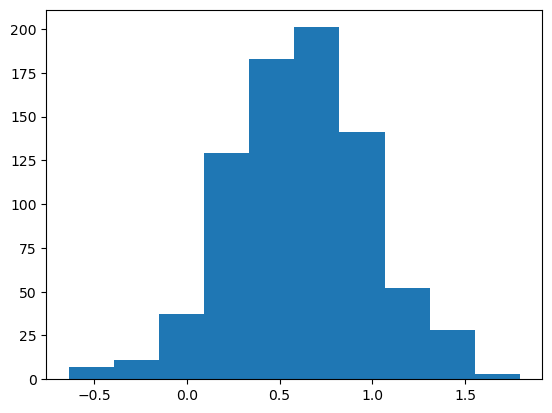

In [44]:
ols_pdp = result3.predict(xrp1)
plt.hist(ols_pdp)

In [45]:
r3p = result3.pvalues
r3pdf = pd.DataFrame(r3p)
r3pdf = r3pdf.reset_index()
a3 = r2pdf.nsmallest(15, 0)
print(a3)
ten3 = a3['index'].to_list()

            index         0
67        z_knr_2  0.000417
88    r_surface_1  0.001389
79  trafficarea_2  0.002254
32     curbtype_2  0.003191
85      r_width_5  0.023017
2           iemin  0.034471
69        z_knr_4  0.035271
34        z_qnr_2  0.036908
74        z_knr_9  0.042756
92   speedlimit_3  0.048674
94   speedlimit_5  0.064298
1              ie  0.082539
52       z_qnr_20  0.106309
3           iemax  0.116383
22          dcurb  0.126454


In [46]:
y3 = acv['pdp']
x3i = acv[ten3]
x3i = sm.add_constant(x3i)
model3i = sm.OLS(y3, x3i)
result3i = model3i.fit()
result3i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pdp   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.894
Date:                Fri, 26 Apr 2024   Prob (F-statistic):             0.0269
Time:                        08:51:59   Log-Likelihood:                -200.75
No. Observations:                 295   AIC:                             431.5
Df Residuals:                     280   BIC:                             486.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
z_knr_2           0.4441      0.206      2.159      0.032       0.039       0.849
r_surface_1       0.5147      0.053      9.751      0.000       0.411       0.619
trafficarea_2    -0.1132      0.101     -1.122      0.263      -0.312       0.085
curbtype_2       -0.0303      0.095     -0.320      0.749      -0.217       0.156
r_width_5         0.0093      0.063      0.147      0.883      -0.115       0.133
iemin             0.0623      0.160      0.390      0.697      -0.253       0.377
z_knr_4          -0.0006      0.077     -0.008      0.994      -0.153       0.151
z_qnr_2          -0.4009      0.331     -1.210      0.227      -1.053       0.251
z_knr_9          -0.1118      0.079     -1.412      0.159      -0.268       0.044
speedlimit_3      0.3944      0.507      0.778      0.437      -0.603       1.392
speedlimit_5     -0.2833      0.505     -0.561      0.576      -1.278       0.712
ie               -0.2249      0.260     -0.865      0.388      -0.737       0.287
z_qnr_20          0.2384      0.144      1.653      0.099      -0.045       0.522
iemax             0.1624      0.129      1.255      0.211      -0.092       0.417
dcurb            -0.0882      0.030     -2.945      0.003      -0.147      -0.029
==============================================================================
Omnibus:                     1800.237   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.855
Skew:                           0.025   Prob(JB):                     9.93e-09
Kurtosis:                       1.269   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
y4 = acv['LV']
x = acv[cn]
x = sm.add_constant(x)
model4 = sm.OLS(y4, x)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LV   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.9067
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.685
Time:                        08:52:04   Log-Likelihood:                -195.57
No. Observations:                 295   AIC:                             543.1
Df Residuals:                     219   BIC:                             823.3
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                   0.2035      0.330      0.617      0.538      -0.446       0.853
ie                  -0.6269      0.328     -1.910      0.057      -1.274       0.020
iemin                0.4566      0.203      2.252      0.025       0.057       0.856
iemax                0.2651      0.165      1.603      0.110      -0.061       0.591
mew                 -0.2070      0.180     -1.151      0.251      -0.561       0.147
mewmin               0.0680      0.120      0.569      0.570      -0.168       0.304
mewmax               0.1535      0.099      1.545      0.124      -0.042       0.349
meg                 -0.0046      0.126     -0.037      0.971      -0.253       0.243
megmin               0.0478      0.090      0.528      0.598      -0.131       0.226
megmax              -0.0233      0.068     -0.341      0.734      -0.158       0.111
cmean               -0.0011      0.180     -0.006      0.995      -0.356       0.353
cmin                 0.0542      0.041      1.337      0.183      -0.026       0.134
cmax                -0.0768      0.239     -0.322      0.748      -0.547       0.394
dbusl               -0.0598      0.048     -1.243      0.215      -0.155       0.035
dtraml              -0.0494      0.049     -1.003      0.317      -0.146       0.048
dtrainl              0.0469      0.046      1.008      0.315      -0.045       0.138
dplight              0.0410      0.040      1.026      0.306      -0.038       0.120
dstation            -0.0527      0.041     -1.270      0.205      -0.134       0.029
dparkcar             0.0062      0.048      0.130      0.897      -0.088       0.100
dparktw              0.0085      0.046      0.186      0.853      -0.082       0.099
dpedcro             -0.0080      0.040     -0.199      0.843      -0.087       0.071
dstopsign           -0.0369      0.053     -0.693      0.489      -0.142       0.068
dcurb                0.1093      0.069      1.580      0.116      -0.027       0.246
dtrafficarea        -0.0823      0.055     -1.485      0.139      -0.191       0.027
droad                0.0100      0.069      0.145      0.885      -0.126       0.146
dvfpath             -0.0266      0.055     -0.485      0.628      -0.135       0.081
gvm_dwv             -0.2898      0.301     -0.963      0.337      -0.883       0.303
gvm_msp              0.4401      0.256      1.720      0.087      -0.064       0.944
gvm_asp             -0.2051      0.304     -0.674      0.501      -0.805       0.394
r_width_value       -0.0640      0.060     -1.073      0.285      -0.182       0.054
speedlimit_value    -0.0230      0.125     -0.184      0.854      -0.269       0.223
curbtype_1           0.0869      0.087      0.998      0.319      -0.085       0.258
curbtype_2           0.2253      0.091      2.466      0.014       0.045       0.405
z_qnr_1             -0.

In [305]:
r4p = result4.pvalues
r4pdf = pd.DataFrame(r4p)
r4pdf = r4pdf.reset_index()
a4 = r4pdf.nsmallest(15, 0)
print(a4)
ten4 = a4['index'].to_list()

            index         0
67        z_knr_2  0.001014
88    r_surface_1  0.001245
32     curbtype_2  0.014419
85      r_width_5  0.019706
2           iemin  0.025343
76       z_knr_11  0.033367
79  trafficarea_2  0.041182
1              ie  0.057437
92   speedlimit_3  0.060777
64       z_qnr_32  0.062814
27        gvm_msp  0.086848
94   speedlimit_5  0.087456
3           iemax  0.110354
69        z_knr_4  0.114608
22          dcurb  0.115573


(array([  3.,   5.,  28.,  77., 250., 184., 134.,  84.,  23.,   4.]),
 array([-1.03952455, -0.63584838, -0.2321722 ,  0.17150398,  0.57518015,
         0.97885633,  1.3825325 ,  1.78620868,  2.18988486,  2.59356103,
         2.99723721]),
 <BarContainer object of 10 artists>)

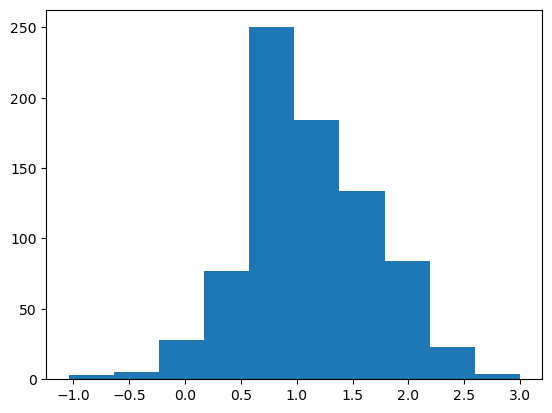

In [48]:
ols_lv = result4.predict(xrp1)
plt.hist(ols_lv)

In [49]:
y6 = acv['SV']
x = acv[cn]
x = sm.add_constant(x)
model6 = sm.OLS(y6, x)
result6 = model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SV   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.083
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.325
Time:                        08:52:09   Log-Likelihood:                -80.491
No. Observations:                 295   AIC:                             313.0
Df Residuals:                     219   BIC:                             593.2
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                  -0.0674      0.223     -0.302      0.763      -0.507       0.372
ie                   0.3671      0.222      1.652      0.100      -0.071       0.805
iemin               -0.1745      0.137     -1.271      0.205      -0.445       0.096
iemax               -0.2033      0.112     -1.816      0.071      -0.424       0.017
mew                 -0.0885      0.122     -0.727      0.468      -0.328       0.151
mewmin               0.0526      0.081      0.650      0.516      -0.107       0.212
mewmax              -0.0120      0.067     -0.178      0.859      -0.145       0.121
meg                 -0.0277      0.085     -0.325      0.745      -0.196       0.140
megmin               0.0162      0.061      0.265      0.791      -0.104       0.137
megmax               0.0570      0.046      1.232      0.219      -0.034       0.148
cmean                0.1118      0.122      0.918      0.360      -0.128       0.352
cmin                -0.0231      0.027     -0.843      0.400      -0.077       0.031
cmax                -0.0842      0.162     -0.521      0.603      -0.403       0.234
dbusl               -0.0136      0.033     -0.417      0.677      -0.078       0.051
dtraml              -0.0018      0.033     -0.053      0.958      -0.067       0.064
dtrainl             -0.0465      0.031     -1.477      0.141      -0.109       0.016
dplight             -0.0307      0.027     -1.135      0.257      -0.084       0.023
dstation             0.0415      0.028      1.479      0.141      -0.014       0.097
dparkcar            -0.0206      0.032     -0.641      0.522      -0.084       0.043
dparktw              0.0185      0.031      0.592      0.554      -0.043       0.080
dpedcro              0.0192      0.027      0.707      0.480      -0.034       0.073
dstopsign            0.0183      0.036      0.506      0.613      -0.053       0.089
dcurb               -0.0830      0.047     -1.773      0.078      -0.175       0.009
dtrafficarea         0.0161      0.038      0.430      0.668      -0.058       0.090
droad                0.1117      0.047      2.388      0.018       0.020       0.204
dvfpath              0.0103      0.037      0.277      0.782      -0.063       0.083
gvm_dwv              0.2422      0.204      1.188      0.236      -0.159       0.644
gvm_msp             -0.1015      0.173     -0.586      0.559      -0.443       0.240
gvm_asp             -0.0578      0.206     -0.281      0.779      -0.464       0.348
r_width_value        0.0418      0.040      1.036      0.301      -0.038       0.121
speedlimit_value     0.0828      0.085      0.979      0.329      -0.084       0.249
curbtype_1           0.1169      0.059      1.984      0.048       0.001       0.233
curbtype_2           0.0513      0.062      0.829      0.408      -0.071       0.173
z_qnr_1             -0.

(array([ 23., 115., 313., 221.,  72.,  24.,  18.,   3.,   1.,   2.]),
 array([-0.67807218, -0.39913541, -0.12019864,  0.15873813,  0.4376749 ,
         0.71661167,  0.99554844,  1.27448521,  1.55342198,  1.83235875,
         2.11129552]),
 <BarContainer object of 10 artists>)

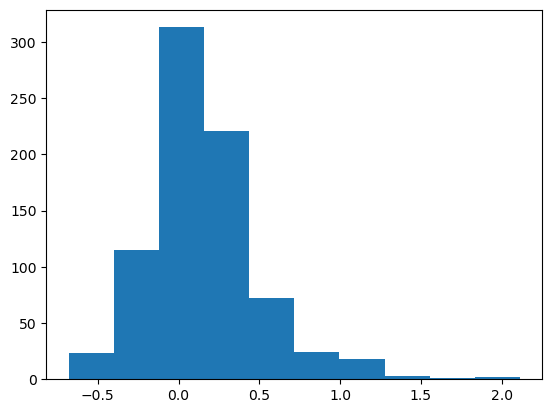

In [50]:
ols_sv = result6.predict(xrp1)
plt.hist(ols_sv)

In [51]:
y5 = acv['pd']
x = acv[cn]
x = sm.add_constant(x)
model5 = sm.OLS(y5, x)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.9467
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.601
Time:                        08:52:16   Log-Likelihood:                -2778.3
No. Observations:                 295   AIC:                             5709.
Df Residuals:                     219   BIC:                             5989.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp               -2357.3470   2090.466     -1.128      0.261   -6477.352    1762.658
ie               -4420.0586   2082.051     -2.123      0.035   -8523.479    -316.638
iemin             1451.5370   1286.219      1.129      0.260   -1083.414    3986.488
iemax             2743.7248   1049.128      2.615      0.010     676.046    4811.403
mew                363.5500   1140.569      0.319      0.750   -1884.347    2611.447
mewmin            -404.4171    758.341     -0.533      0.594   -1898.998    1090.164
mewmax            -164.8401    630.168     -0.262      0.794   -1406.810    1077.130
meg               -539.3667    798.166     -0.676      0.500   -2112.436    1033.703
megmin             144.0153    573.926      0.251      0.802    -987.110    1275.140
megmax             429.1394    433.196      0.991      0.323    -424.626    1282.905
cmean              428.0288   1140.989      0.375      0.708   -1820.696    2676.753
cmin              -262.6005    257.107     -1.021      0.308    -769.321     244.120
cmax               711.0226   1514.829      0.469      0.639   -2274.486    3696.531
dbusl             -344.5291    305.174     -1.129      0.260    -945.984     256.925
dtraml             130.2200    312.120      0.417      0.677    -484.923     745.363
dtrainl            207.5107    294.928      0.704      0.482    -373.749     788.771
dplight            258.8727    253.719      1.020      0.309    -241.171     758.916
dstation           315.8792    262.984      1.201      0.231    -202.425     834.183
dparkcar          -129.7431    301.631     -0.430      0.668    -724.213     464.727
dparktw           -220.5892    291.972     -0.756      0.451    -796.023     354.845
dpedcro           -347.0310    254.645     -1.363      0.174    -848.900     154.838
dstopsign          284.2586    337.877      0.841      0.401    -381.649     950.166
dcurb              -82.9406    438.774     -0.189      0.850    -947.700     781.819
dtrafficarea        30.7327    351.479      0.087      0.930    -661.982     723.447
droad             -456.8099    438.363     -1.042      0.299   -1320.760     407.141
dvfpath            234.7222    347.689      0.675      0.500    -450.523     919.968
gvm_dwv          -1377.0871   1909.519     -0.721      0.472   -5140.473    2386.299
gvm_msp             34.5856   1622.936      0.021      0.983   -3163.987    3233.158
gvm_asp           1593.6280   1929.565      0.826      0.410   -2209.265    5396.521
r_width_value      -11.2898    378.514     -0.030      0.976    -757.287     734.708
speedlimit_value   289.3672    792.334      0.365      0.715   -1272.209    1850.943
curbtype_1         489.8502    551.991      0.887      0.376    -598.045    1577.745
curbtype_2         -28.0373    579.473     -0.048      0.961   -1170.094    1114.019
z_qnr_1           -583.

In [306]:
r5p = result5.pvalues
r5pdf = pd.DataFrame(r5p)
r5pdf = r5pdf.reset_index()
a5 = r5pdf.nsmallest(15, 0)
print(a5)
ten5 = a5['index'].to_list()

            index         0
53       z_qnr_21  0.004441
79  trafficarea_2  0.006080
3           iemax  0.009536
74        z_knr_9  0.013566
80  trafficarea_3  0.016059
1              ie  0.034882
68        z_knr_3  0.146424
20        dpedcro  0.174344
17       dstation  0.230997
52       z_qnr_20  0.251807
13          dbusl  0.260151
2           iemin  0.260331
0              cp  0.260695
49       z_qnr_17  0.272627
96   bicyclecount  0.289642


(array([  1.,   4.,  32., 104., 223., 216., 136.,  57.,  13.,   6.]),
 array([-7136.36624324, -5657.97653916, -4179.58683509, -2701.19713102,
        -1222.80742695,   255.58227713,  1733.9719812 ,  3212.36168527,
         4690.75138934,  6169.14109342,  7647.53079749]),
 <BarContainer object of 10 artists>)

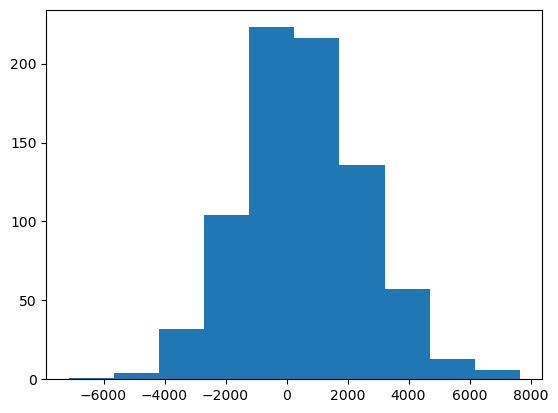

In [52]:
ols_pd = result5.predict(xrp1)
plt.hist(ols_pd)

In [53]:
y11 = acv['inp']
x = acv[cn]
x = sm.add_constant(x)
model11 = sm.OLS(y11, x)
result11 = model11.fit()
result11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    inp   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.199
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.159
Time:                        08:52:18   Log-Likelihood:                -51.645
No. Observations:                 295   AIC:                             255.3
Df Residuals:                     219   BIC:                             535.5
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                   0.1437      0.202      0.710      0.478      -0.255       0.543
ie                  -0.0717      0.202     -0.356      0.723      -0.469       0.326
iemin                0.1398      0.124      1.123      0.263      -0.106       0.385
iemax                0.0052      0.102      0.051      0.959      -0.195       0.205
mew                 -0.0867      0.110     -0.785      0.433      -0.304       0.131
mewmin               0.0312      0.073      0.425      0.672      -0.113       0.176
mewmax               0.0540      0.061      0.886      0.377      -0.066       0.174
meg                  0.0588      0.077      0.761      0.448      -0.093       0.211
megmin               0.0043      0.056      0.077      0.939      -0.105       0.114
megmax              -0.0193      0.042     -0.460      0.646      -0.102       0.063
cmean               -0.0247      0.110     -0.224      0.823      -0.242       0.193
cmin                 0.0270      0.025      1.085      0.279      -0.022       0.076
cmax                -0.0541      0.147     -0.369      0.713      -0.343       0.235
dbusl               -0.0239      0.030     -0.808      0.420      -0.082       0.034
dtraml              -0.0400      0.030     -1.325      0.187      -0.100       0.020
dtrainl             -0.0356      0.029     -1.246      0.214      -0.092       0.021
dplight              0.0040      0.025      0.164      0.870      -0.044       0.052
dstation            -0.0151      0.025     -0.593      0.554      -0.065       0.035
dparkcar            -0.0223      0.029     -0.763      0.446      -0.080       0.035
dparktw              0.0285      0.028      1.008      0.314      -0.027       0.084
dpedcro              0.0365      0.025      1.482      0.140      -0.012       0.085
dstopsign           -0.0250      0.033     -0.764      0.446      -0.089       0.039
dcurb                0.0313      0.042      0.738      0.461      -0.052       0.115
dtrafficarea        -0.0346      0.034     -1.016      0.311      -0.102       0.032
droad                0.0840      0.042      1.979      0.049       0.000       0.168
dvfpath             -0.0217      0.034     -0.646      0.519      -0.088       0.045
gvm_dwv             -0.0375      0.185     -0.203      0.839      -0.402       0.327
gvm_msp              0.0604      0.157      0.384      0.701      -0.249       0.370
gvm_asp             -0.0041      0.187     -0.022      0.982      -0.372       0.364
r_width_value       -0.0237      0.037     -0.647      0.518      -0.096       0.048
speedlimit_value     0.0755      0.077      0.984      0.326      -0.076       0.227
curbtype_1           0.1453      0.053      2.721      0.007       0.040       0.251
curbtype_2           0.2528      0.056      4.507      0.000       0.142       0.363
z_qnr_1             -0.

In [286]:
r11p = result11.pvalues
r11pdf = pd.DataFrame(r11p)
r11pdf = r11pdf.reset_index()
a11 = r11pdf.nsmallest(15, 0)
print(a11)
ten11 = a11['index'].to_list()

            index             0
88    r_surface_1  1.009575e-10
32     curbtype_2  1.068503e-05
79  trafficarea_2  6.393825e-05
31     curbtype_1  7.041042e-03
53       z_qnr_21  2.331497e-02
52       z_qnr_20  2.480099e-02
24          droad  4.907670e-02
85      r_width_5  5.253613e-02
91   speedlimit_2  5.403169e-02
56       z_qnr_24  8.351476e-02
69        z_knr_4  8.554861e-02
95   speedlimit_6  9.137102e-02
51       z_qnr_19  9.333086e-02
90   speedlimit_1  1.118710e-01
38        z_qnr_6  1.124317e-01


In [289]:
r11pdf.nsmallest(15, 0)

,index,0
88,r_surface_1,1.009575e-10
32,curbtype_2,1.068503e-05
79,trafficarea_2,6.393825e-05
31,curbtype_1,7.041042e-03
53,z_qnr_21,2.331497e-02
52,z_qnr_20,2.480099e-02
24,droad,4.907670e-02
85,r_width_5,5.253613e-02
91,speedlimit_2,5.403169e-02
56,z_qnr_24,8.351476e-02


In [287]:
print(ten11[0]*1000000)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



(array([ 12.,  21.,  63., 158., 193., 162.,  93.,  65.,  19.,   6.]),
 array([0.22256257, 0.39643417, 0.57030578, 0.74417738, 0.91804898,
        1.09192058, 1.26579218, 1.43966378, 1.61353538, 1.78740698,
        1.96127858]),
 <BarContainer object of 10 artists>)

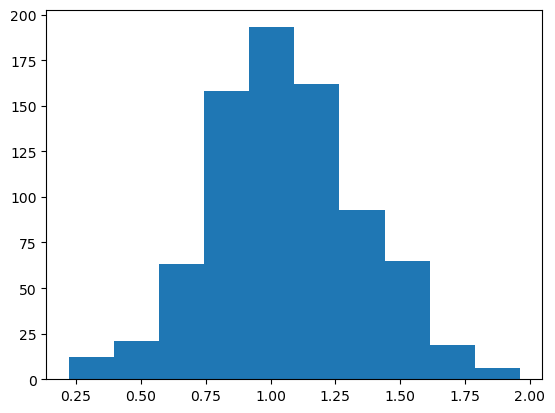

In [54]:
ols_inp = result11.predict(xrp1)
plt.hist(ols_inp)

In [55]:
# Presence or not
y7 = acv['svp']
y8 = acv['lvp']
y9 = acv['pdp']
y10 = acv['inp']
x = acv[cn]

Train data accuracy: 0.9265536723163842
Test data accuracy: 0.8220338983050848
accuracy 0.8220338983050848
precision [0.82051282 1.        ]
sensitivity recall [1.         0.04545455]
f1 score [0.90140845 0.08695652]
mcc score 0.19312181983410703
kappa 0.07191011235955069


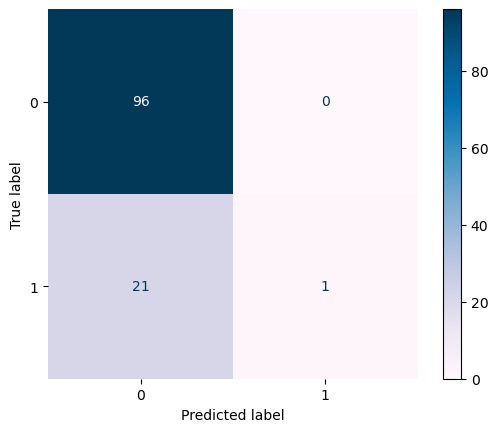

In [137]:
# SVP 7
X_train7, X_test7, y_train7, y_test7 = train_test_split(x, y7, 
                                                        test_size = 0.4, random_state = 17)
rfc7 = RandomForestClassifier(n_estimators=15, max_depth=5, 
                              random_state = 17) # 6 because of following codes to find the best number of trees
rfc7.fit(X_train7, y_train7)
y_pred_rfc7 = rfc7.predict(X_test7)
print("Train data accuracy:",accuracy_score(y_true = y_train7, y_pred = rfc7.predict(X_train7)))
print("Test data accuracy:",accuracy_score(y_true = y_test7, y_pred = y_pred_rfc7))
confusion_matrix_rfc7 = metrics.confusion_matrix(y_test7, y_pred_rfc7)
cm_display_rfc7 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc7)
cm_display_rfc7.plot(cmap = 'PuBu')
plt.box(False)
acc_rfc7 = metrics.accuracy_score(y_test7, y_pred_rfc7)
print('accuracy', acc_rfc7)
pre_rfc7 = metrics.precision_score(y_test7, y_pred_rfc7, average = None)
print('precision', pre_rfc7)
senrec_rfc7 = metrics.recall_score(y_test7, y_pred_rfc7, average = None)
print('sensitivity recall', senrec_rfc7)
f1_rfc7 = metrics.f1_score(y_test7, y_pred_rfc7, average = None)
print('f1 score', f1_rfc7)
mcc_rfc7 = metrics.matthews_corrcoef(y_test7, y_pred_rfc7)
print('mcc score', mcc_rfc7)
ka_rfc7 = metrics.cohen_kappa_score(y_test7, y_pred_rfc7)
print('kappa', ka_rfc7)

In [138]:
# joblib.dump(rfc7, "pm_svp_1.joblib")

['pm_svp_1.joblib']

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

Text(0, 0.5, 'accuracy')

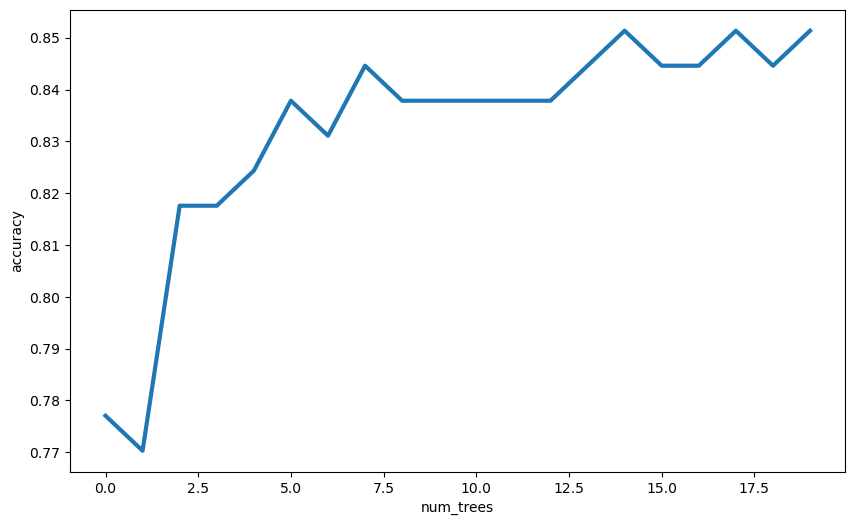

In [105]:
# rf = RandomForestClassifier(n_estimators=20, max_depth=5, n_jobs=-1)
# rf.fit(X_train7, y_train7)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test7)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test7, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# # # best n_estimator 18

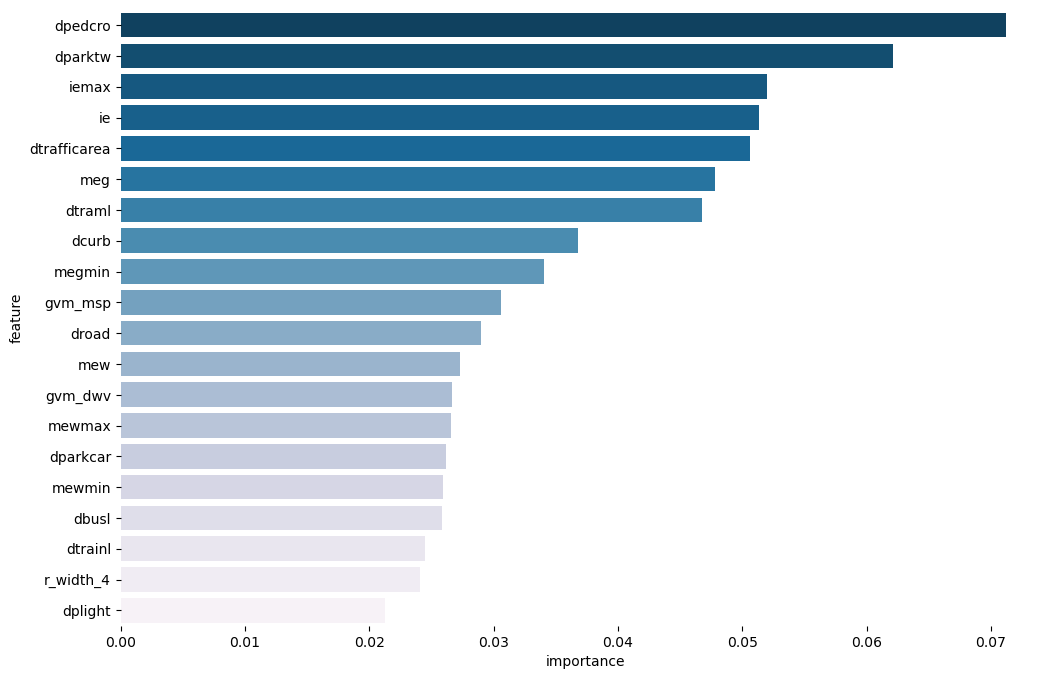

In [139]:
feature_name = list(x.columns.values.tolist())
importances = rfc7.feature_importances_
df_rfc7 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc7.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfc7t = df_rfc7.nlargest(20, 'importances')
plt.figure(figsize = (12,8))
sn.barplot(x = df_rfc7t['importances'], y = df_rfc7t['features'],
           palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
# plt.savefig('svp_rf_importance.png')

Train data accuracy: 0.8416289592760181
Test data accuracy: 0.7027027027027027
accuracy 0.7027027027027027
precision [0.5        0.70833333]
sensitivity recall [0.04545455 0.98076923]
f1 score [0.08333333 0.82258065]
mcc score 0.07391404949863532
kappa 0.035545023696682554


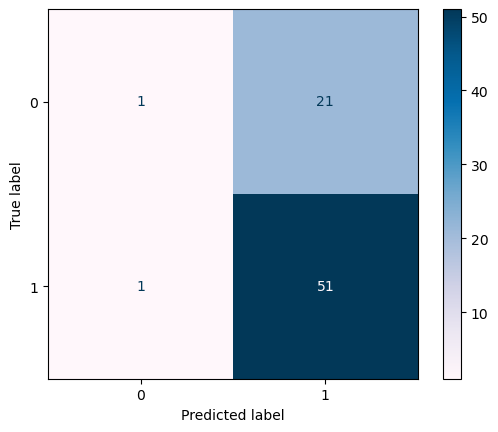

In [150]:
# LVP 8
X_train8, X_test8, y_train8, y_test8 = train_test_split(x, y8, 
                                                        test_size = 0.25, 
                                                        random_state = 8)
rfc8 = RandomForestClassifier(n_estimators = 15, max_depth=5,random_state = 8)
rfc8.fit(X_train8, y_train8)
y_pred_rfc8 = rfc8.predict(X_test8)
print("Train data accuracy:",accuracy_score(y_true = y_train8, y_pred = rfc8.predict(X_train8)))
print("Test data accuracy:",accuracy_score(y_true = y_test8, y_pred = y_pred_rfc8))
confusion_matrix_rfc8 = metrics.confusion_matrix(y_test8, y_pred_rfc8)
cm_display_rfc8 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc8)
cm_display_rfc8.plot(cmap = 'PuBu')
# cm_display_rfc7.plot(cmap = 'PuBu')
acc_rfc8 = metrics.accuracy_score(y_test8, y_pred_rfc8)
print('accuracy', acc_rfc8)
pre_rfc8 = metrics.precision_score(y_test8, y_pred_rfc8, average = None)
print('precision', pre_rfc8)
senrec_rfc8 = metrics.recall_score(y_test8, y_pred_rfc8, average = None)
print('sensitivity recall', senrec_rfc8)
f1_rfc8 = metrics.f1_score(y_test8, y_pred_rfc8, average = None)
print('f1 score', f1_rfc8)
mcc_rfc8 = metrics.matthews_corrcoef(y_test8, y_pred_rfc8)
print('mcc score', mcc_rfc8)
ka_rfc8 = metrics.cohen_kappa_score(y_test8, y_pred_rfc8)
print('kappa', ka_rfc8)

In [151]:
joblib.dump(rfc8, "pm_lvp_1.joblib")

['pm_lvp_1.joblib']

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

Text(0, 0.5, 'accuracy')

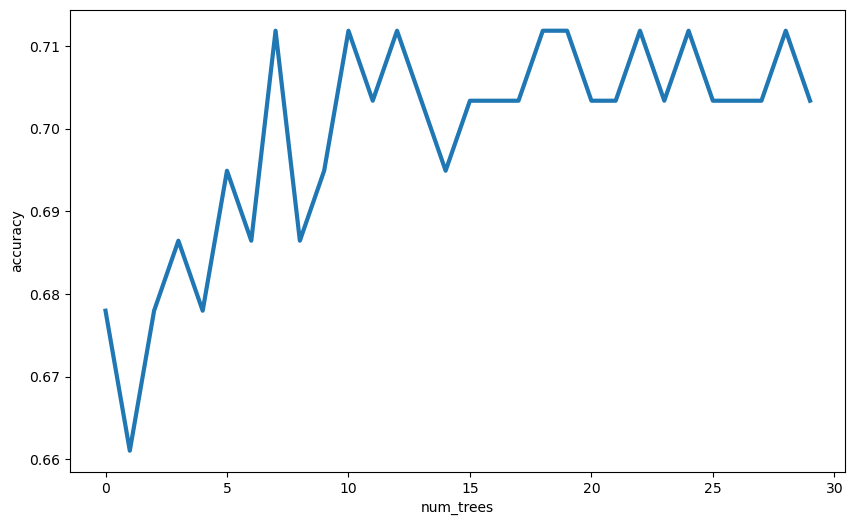

In [148]:
rf = RandomForestClassifier(n_estimators=30, max_depth=3, n_jobs=-1)
rf.fit(X_train8, y_train8)
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_test8)[None, :])
predictions = np.vstack(predictions)
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_test8, np.argmax(pred, axis=1)))
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy')
# # # best n_estimator 12

Text(0, 0.5, 'feature')

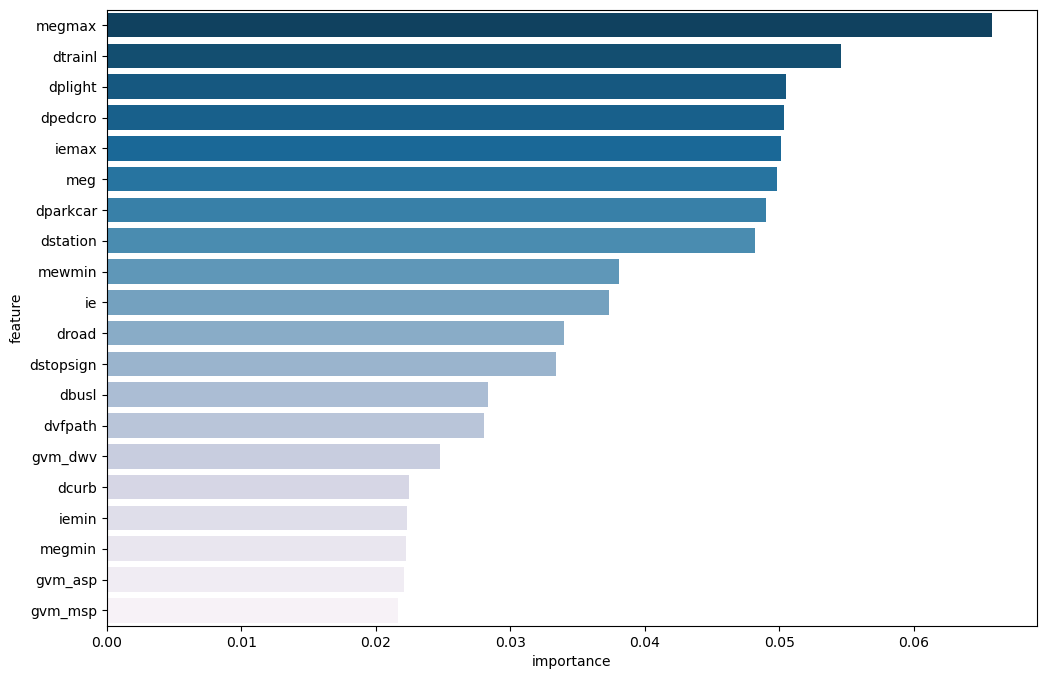

In [152]:
feature_name = list(x.columns.values.tolist())
importances = rfc8.feature_importances_
df_rfc8 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc8.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfc8t = df_rfc8.nlargest(20, 'importances')
plt.figure(figsize = (12,8))
sn.barplot(x = df_rfc8t['importances'], y = df_rfc8t['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
# plt.savefig('lvp_rf_importance.png')

Train data accuracy: 0.8689320388349514
Test data accuracy: 0.5280898876404494
accuracy 0.5280898876404494
precision [0.48275862 0.61290323]
sensitivity recall [0.7       0.3877551]
f1 score [0.57142857 0.475     ]
mcc score 0.09162322358812071
kappa 0.08427241548260656


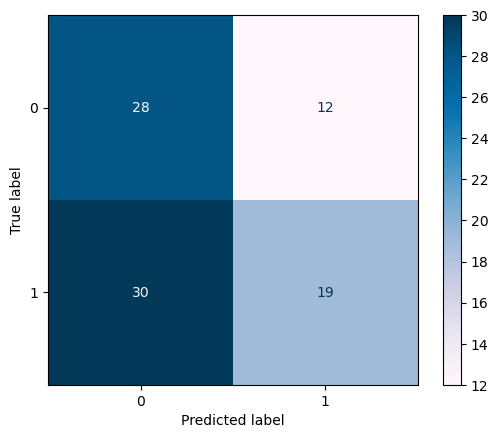

In [180]:
# pdp 9
X_train9, X_test9, y_train9, y_test9 = train_test_split(x, y9, 
                                                        test_size = 0.3, 
                                                        random_state = 9)
rfc9 = RandomForestClassifier(n_estimators = 10, max_depth = 4, random_state = 9) # n_estimators setting from following codes
rfc9.fit(X_train9, y_train9)
y_pred_rfc9 = rfc9.predict(X_test9)
print("Train data accuracy:",accuracy_score(y_true = y_train9, y_pred = rfc9.predict(X_train9)))
print("Test data accuracy:",accuracy_score(y_true = y_test9, y_pred = y_pred_rfc9))
confusion_matrix_rfc9 = metrics.confusion_matrix(y_test9, y_pred_rfc9)
cm_display_rfc9 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc9)
cm_display_rfc9.plot(cmap = 'PuBu')
acc_rfc9 = metrics.accuracy_score(y_test9, y_pred_rfc9)
print('accuracy', acc_rfc9)
pre_rfc9 = metrics.precision_score(y_test9, y_pred_rfc9, average = None)
print('precision', pre_rfc9)
senrec_rfc9 = metrics.recall_score(y_test9, y_pred_rfc9, average = None)
print('sensitivity recall', senrec_rfc9)
f1_rfc9 = metrics.f1_score(y_test9, y_pred_rfc9, average = None)
print('f1 score', f1_rfc9)
mcc_rfc9 = metrics.matthews_corrcoef(y_test9, y_pred_rfc9)
print('mcc score', mcc_rfc9)
ka_rfc9 = metrics.cohen_kappa_score(y_test9, y_pred_rfc9)
print('kappa', ka_rfc9)

In [181]:
# joblib.dump(rfc9, "pm_pdp_1.joblib")

['pm_pdp_1.joblib']

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

Text(0, 0.5, 'accuracy')

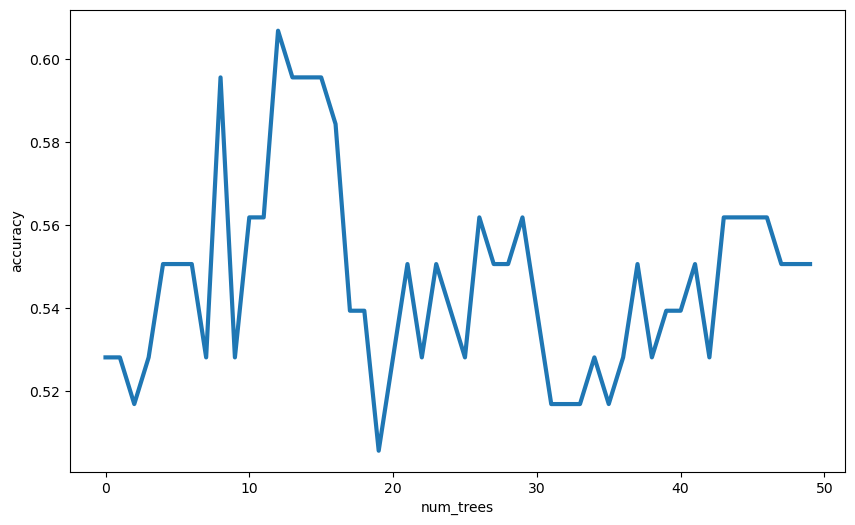

In [162]:
# rf = RandomForestClassifier(n_estimators=50, max_depth=4, n_jobs=-1)
# rf.fit(X_train9, y_train9)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test9)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test9, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# # # best n_estimator 15

Text(0, 0.5, 'feature')

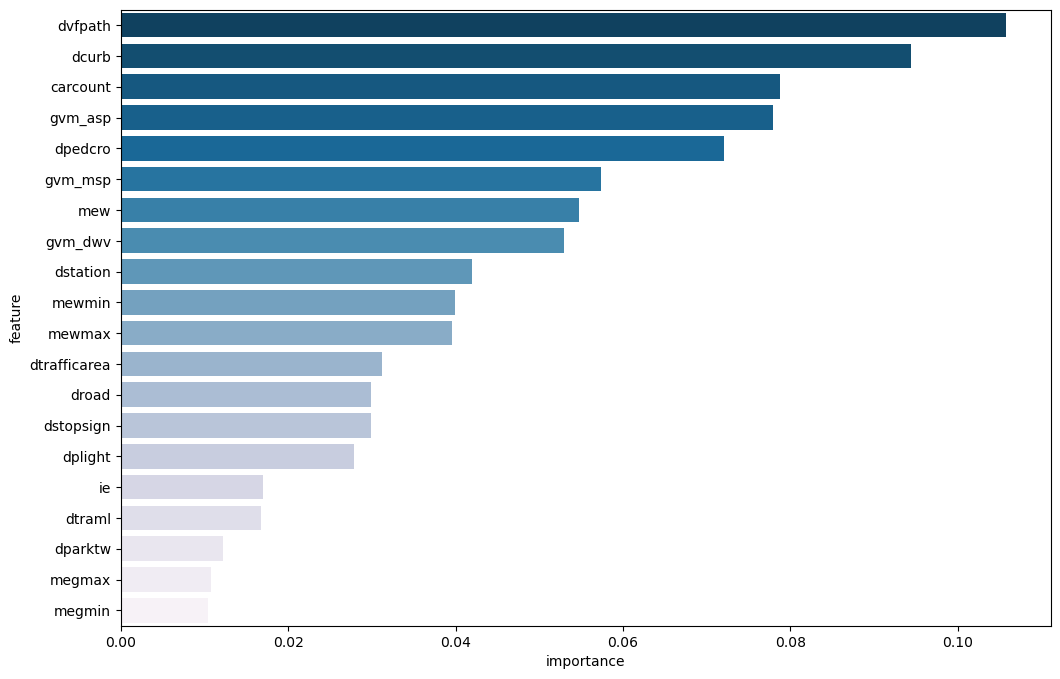

In [183]:
feature_name = list(x.columns.values.tolist())
importances = rfc9.feature_importances_
df_rfc9 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc9.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfc9t = df_rfc9.nlargest(20, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfc9t['importances'], y = df_rfc9t['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
# plt.savefig('pd_rf_importance.png')

Train data accuracy: 0.961864406779661
Test data accuracy: 0.8135593220338984
accuracy 0.8135593220338984
precision [1.         0.81034483]
sensitivity recall [0.08333333 1.        ]
f1 score [0.15384615 0.8952381 ]
mcc score 0.259862917000837
kappa 0.1265141318977121


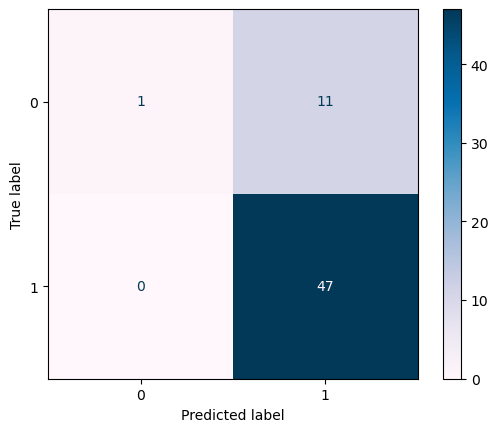

In [187]:
# inp 10
X_train10, X_test10, y_train10, y_test10 = train_test_split(x, y10, 
                                                        test_size = 0.2, 
                                                        random_state = 10)
rfc10 = RandomForestClassifier(n_estimators = 12, max_depth = 8, random_state = 10) # n_estimators setting from following codes
rfc10.fit(X_train10, y_train10)
y_pred_rfc10 = rfc10.predict(X_test10)
print("Train data accuracy:",accuracy_score(y_true = y_train10, y_pred = rfc10.predict(X_train10)))
print("Test data accuracy:",accuracy_score(y_true = y_test10, y_pred = y_pred_rfc10))
confusion_matrix_rfc10 = metrics.confusion_matrix(y_test10, y_pred_rfc10)
cm_display_rfc10 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc10)
cm_display_rfc10.plot(cmap = 'PuBu')
acc_rfc10 = metrics.accuracy_score(y_test10, y_pred_rfc10)
print('accuracy', acc_rfc10)
pre_rfc10 = metrics.precision_score(y_test10, y_pred_rfc10, average = None)
print('precision', pre_rfc10)
senrec_rfc10 = metrics.recall_score(y_test10, y_pred_rfc10, average = None)
print('sensitivity recall', senrec_rfc10)
f1_rfc10 = metrics.f1_score(y_test10, y_pred_rfc10, average = None)
print('f1 score', f1_rfc10)
mcc_rfc10 = metrics.matthews_corrcoef(y_test10, y_pred_rfc10)
print('mcc score', mcc_rfc10)
ka_rfc10 = metrics.cohen_kappa_score(y_test10, y_pred_rfc10)
print('kappa', ka_rfc10)

In [188]:
joblib.dump(rfc10, "pm_inp_1.joblib")

['pm_inp_1.joblib']

In [67]:
# rf = RandomForestClassifier(n_estimators=20, max_depth=5, n_jobs=-1)
# rf.fit(X_train10, y_train10)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test10)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test10, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# # best n_estimator 12

Text(0, 0.5, 'feature')

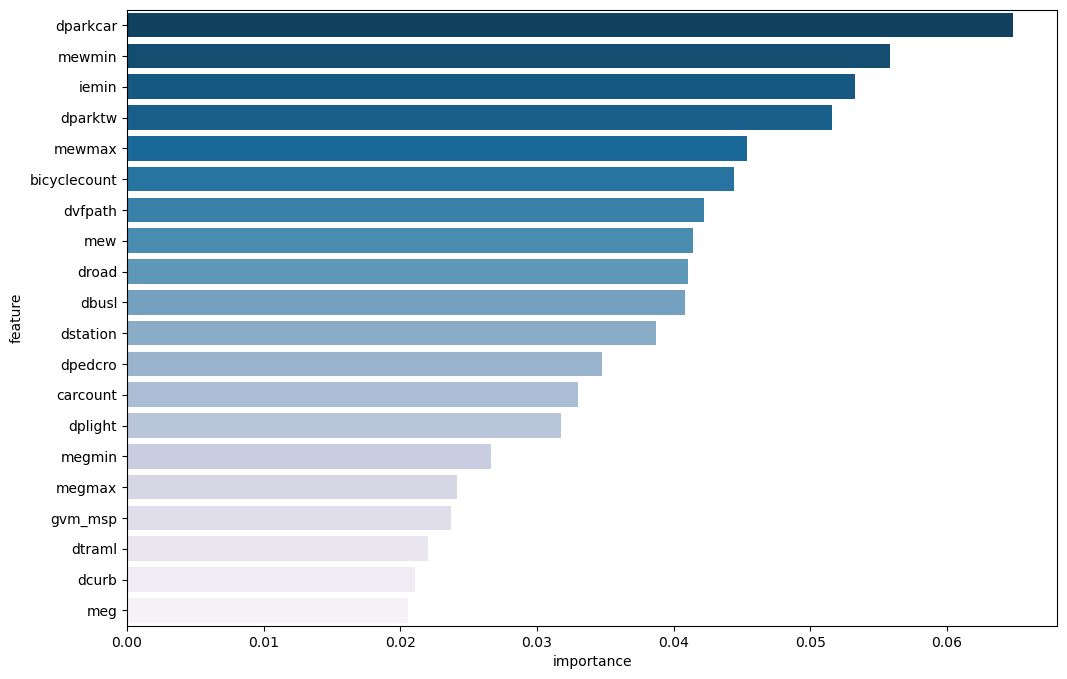

In [190]:
feature_name = list(x.columns.values.tolist())
importances = rfc10.feature_importances_
df_rfc10 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc10.sort_values(by = ['importances'], ascending = False, inplace = True)
df_rfc10t = df_rfc10.nlargest(20, 'importances')
plt.figure(figsize = [12,8])
sn.barplot(x = df_rfc10t['importances'], y = df_rfc10t['features'],palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
# plt.savefig('pd_rf_importance.png')

In [69]:
# rfc7 svp
# rfc8 lvp
# rfc9 pdp
# rfc10 inp

In [241]:
xrpv = rpv[cn]

In [242]:
rp_pred_svp = rfc7.predict(xrpv)
rp_pred_lvp = rfc8.predict(xrpv)
rp_pred_pdp = rfc9.predict(xrpv)
rp_pred_inp = rfc10.predict(xrpv)

In [243]:
xrpvr = xrpv.copy(deep =True)

In [244]:
xrpvr['svp'] = rp_pred_svp
xrpvr['lvp'] = rp_pred_lvp
xrpvr['pdp'] = rp_pred_pdp
xrpvr['inp'] = rp_pred_inp

In [245]:
df_rpsvp = pd.merge(rpv, xrpvr, on = cn)

In [246]:
df_rpsvp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Columns: 115 entries, id to inp
dtypes: float64(35), int64(78), object(2)
memory usage: 711.7+ KB


In [247]:
dfvpcopy = df_rpsvp.copy(deep =True)
pred_rp_class = dfvpcopy.drop(cn, axis = 1)

In [248]:
pred_rp_class.columns

Index(['id', 'droad_sl', 'd_bicyclecount', 'd_carcount', 'curbtype', 'z_qnr',
       'z_knr', 'trafficarea', 'r_width', 'r_surface', 'speedlimit',
       'z_qnr_34', 'speedlimit_7', 'svp', 'lvp', 'pdp', 'inp'],
      dtype='object')

In [249]:
pred_rp_class = pred_rp_class.drop(['droad_sl', 'd_bicyclecount', 'd_carcount','curbtype', 'z_qnr', 'z_knr', 'trafficarea', 'r_width',
                                    'r_surface', 'speedlimit', 'z_qnr_34', 'speedlimit_7'], axis = 1)

In [250]:
# pred_rp_class.to_csv('/home/yelhe/script/mt/model/rp_result.csv', index = False)

In [254]:
# pred_rp_class.groupby(['o']).size()

lvp
0     41
1    751
dtype: int64

In [255]:
rf_ols = pred_rp_class.copy(deep = True)
rf_ols['ols_svp'] = ols_svp
rf_ols['ols_lvp'] = ols_lvp
rf_ols['ols_pdp'] = ols_pdp
rf_ols['ols_inp'] = ols_inp
rf_ols['ols_sv'] = ols_sv
rf_ols['ols_lv'] = ols_lv
rf_ols['ols_pd'] = ols_pd

In [256]:
# rf_ols.to_csv('/home/yelhe/script/mt/model/rp_result_rf_ols.csv', index = False)

In [257]:
rf_ols_c.columns

Index(['id', 'svp', 'lvp', 'pdp', 'inp', 'ols_svp', 'ols_lvp', 'ols_pdp',
       'ols_inp', 'ols_sv', 'ols_lv', 'ols_pd', 'osvpc', 'olvpc', 'opdpc',
       'oinpc', 'osvc', 'olvc', 'olspdv'],
      dtype='object')

In [258]:
rf_ols_c = rf_ols.copy(deep = True)

In [259]:
rf_ols_c['osvpc'] = rf_ols_c['ols_svp'].round()
rf_ols_c['olvpc'] = rf_ols_c['ols_lvp'].round()
rf_ols_c['opdpc'] = rf_ols_c['ols_pdp'].round()
rf_ols_c['oinpc'] = rf_ols_c['ols_inp'].round()
rf_ols_c['osvc'] = rf_ols_c['ols_sv'].round()
rf_ols_c['olvc'] = rf_ols_c['ols_lv'].round()

In [260]:
rf_ols_c.loc[rf_ols_c['osvpc']< 0,'osvpc']=0
rf_ols_c.loc[rf_ols_c['olvpc']< 0,'olvpc']=0
rf_ols_c.loc[rf_ols_c['opdpc']< 0,'opdpc']=0
rf_ols_c.loc[rf_ols_c['osvc']< 0,'osvc']=0
rf_ols_c.loc[rf_ols_c['olvc']< 0,'olvc']=0
rf_ols_c.loc[rf_ols_c['oinpc']< 0,'oinpc']=0

In [261]:
rf_ols_c['olspdv'] = rf_ols_c['ols_pd'].round()
rf_ols_c.loc[rf_ols_c['olspdv']< 0,'olspdv']=0

In [276]:
rf_ols_c = rf_ols_c.assign(ols_svp_b = 1)

In [277]:
rf_ols_c.loc[rf_ols_c['ols_sv']< 0.5,'ols_svp_b'] = 0

In [279]:
rf_ols_c = rf_ols_c.assign(ols_lvp_b = 1)
rf_ols_c.loc[rf_ols_c['ols_lv']< 0.5,'ols_lvp_b'] = 0
rf_ols_c = rf_ols_c.assign(ols_pdp_b = 1)
rf_ols_c.loc[rf_ols_c['ols_pdp']< 0.5,'ols_pdp_b'] = 0
rf_ols_c = rf_ols_c.assign(ols_inp_b = 1)
rf_ols_c.loc[rf_ols_c['ols_inp']< 0.5,'ols_inp_b'] = 0

In [315]:
rf_ols_c.groupby(['ols_pdp_b']).size()

ols_pdp_b
0    309
1    483
dtype: int64

In [311]:
rf_ols_c.groupby(['oinpc']).size()

oinpc
0.0     22
1.0    703
2.0     67
dtype: int64

(array([  7.,  11.,  37., 129., 183., 201., 141.,  52.,  28.,   3.]),
 array([-0.63647248, -0.39335318, -0.15023388,  0.09288542,  0.33600472,
         0.57912402,  0.82224332,  1.06536262,  1.30848192,  1.55160122,
         1.79472052]),
 <BarContainer object of 10 artists>)

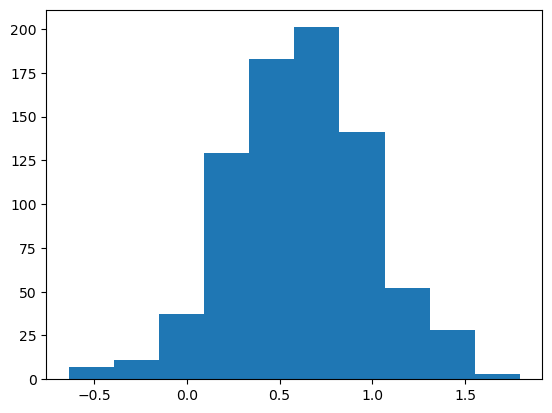

In [310]:
plt.hist(rf_ols['ols_pdp'])

In [262]:
rf_ols_c.columns

Index(['id', 'svp', 'lvp', 'pdp', 'inp', 'ols_svp', 'ols_lvp', 'ols_pdp',
       'ols_inp', 'ols_sv', 'ols_lv', 'ols_pd', 'osvpc', 'olvpc', 'opdpc',
       'oinpc', 'osvc', 'olvc', 'olspdv'],
      dtype='object')

In [275]:
rf_ols_c

,id,svp,lvp,pdp,inp,ols_svp,ols_lvp,ols_pdp,ols_inp,ols_sv,ols_lv,ols_pd,osvpc,olvpc,opdpc,oinpc,osvc,olvc,olspdv
0,2,0,1,1,1,1.113376,0.678428,0.688901,1.505617,1.113376,0.843960,1620.107685,1.0,1.0,1.0,2.0,1.0,1.0,1620.0
1,3,0,1,1,1,0.919762,0.324454,1.266941,1.066534,0.919762,0.512449,6319.644329,1.0,0.0,1.0,1.0,1.0,1.0,6320.0
2,4,0,1,0,1,0.028388,0.551725,0.931606,0.636408,0.028388,0.630341,90.288030,0.0,1.0,1.0,1.0,0.0,1.0,90.0
3,5,0,1,1,1,0.012977,0.861892,1.070056,0.881584,0.012977,1.045742,1635.136696,0.0,1.0,1.0,1.0,0.0,1.0,1635.0
4,6,0,1,1,1,-0.099699,1.011016,0.710208,0.973824,-0.099699,1.081431,680.618444,-0.0,1.0,1.0,1.0,-0.0,1.0,681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,990,0,1,1,1,0.391808,1.356307,0.316229,1.460618,0.391808,1.596291,-3620.042613,0.0,1.0,0.0,1.0,0.0,2.0,0.0
788,991,0,1,1,1,0.584453,1.370898,0.664878,1.577612,0.584453,1.818447,-1070.926181,1.0,1.0,1.0,2.0,1.0,2.0,0.0
789,992,0,1,0,1,0.384795,0.815564,0.202088,1.164250,0.384795,1.001228,-4200.022722,0.0,1.0,0.0,1.0,0.0,1.0,0.0
790,993,0,1,0,1,0.536516,0.634907,-0.601658,1.173809,0.536516,0.817408,-7136.366243,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [283]:
rf_ols_c.to_csv('/home/yelhe/script/mt/model/rp_result_rf_ols_new3.csv', index = False)

In [265]:
rf_ols_c.columns

Index(['id', 'svp', 'lvp', 'pdp', 'inp', 'ols_svp', 'ols_lvp', 'ols_pdp',
       'ols_inp', 'ols_sv', 'ols_lv', 'ols_pd', 'osvpc', 'olvpc', 'opdpc',
       'oinpc', 'osvc', 'olvc', 'olspdv'],
      dtype='object')

(array([697.,   0.,   0.,   0.,   0.,  92.,   0.,   0.,   0.,   3.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

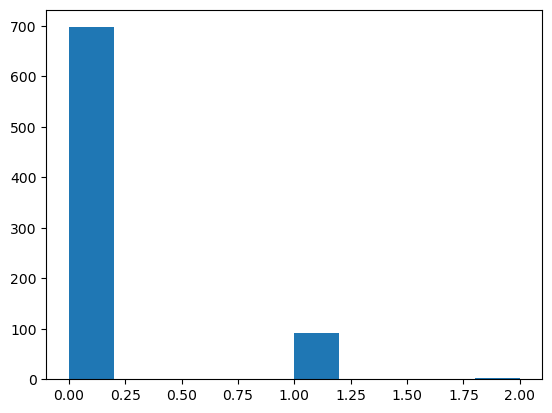

In [300]:
plt.hist(rf_ols_c['osvpc'])

In [ ]:
y1 = acv['svp']
y2 = acv['lvp']
y3 = acv['pdp']
y4 = acv['LV']
y6 = acv['SV']
y5 = acv['pd']
x = acv[cn]

In [240]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size = 0.25, random_state = 2)
rfr1 = RandomForestRegressor(max_depth = 5, random_state = 2)
rfr1.fit(X_train, y_train)
y_pred_rf1 = rfr1.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_rf1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_rf1))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred_rf1, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred_rf1))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred_rf1))
print('Max Error:', metrics.max_error(y_test, y_pred_rf1))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred_rf1))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred_rf1))
print('R^2:', metrics.r2_score(y_test, y_pred_rf1))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred_rf1))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, y_pred_rf2))

Mean Absolute Error (MAE): 0.2669737405935261
Mean Squared Error (MSE): 0.13196171440666876
Root Mean Squared Error (RMSE): 0.3632653498569176
Mean Absolute Percentage Error (MAPE): 736148253062817.2
Explained Variance Score: -0.2016188088515658
Max Error: 0.9519078744605668
Mean Squared Log Error: 0.0707189290338972
Median Absolute Error: 0.1662075014070065
R^2: -0.23525187707849238
Mean Poisson Deviance: 0.6304401226119226
